**In this notebook data from MarkerDB database related to chemical diagnostic markers-disease  associations is processed, inserted into SQL tables and analysed.**

In [65]:
import pandas as pd

**Operations with data from Markerdb database**

In [66]:
#importing the data containing the associations between chemical diagnostic markers and diseases.
df1 = pd.read_excel("all_diagnostic_chemical_markers.xlsx")
df1

,marker_id,marker,name_id,name,patient,gender,sample,concentration,Column9,reference,,Column12,type
0,1,1-Methylhistidine,251,Obesity,Adult: >=18 yrs old,Both,Urine,10.9 (0.80-21.0) umol/mmol creatinine,NaN,"Tuma, P., Samcova, E. & Balinova, P. Determina...",15899597.0,2,Diagnostic
1,1,1-Methylhistidine,1,Normal,Adult: >=18 yrs old,Both,Urine,85.8 (17.7-153.8) umol/mmol creatinine,NaN,David F. Putnam Composition and Concentrative ...,NaN,2,Diagnostic
2,1,1-Methylhistidine,33,Alzheimer's Disease,Adult: >=18 yrs old,Both,Urine,15.7 (11.7-19.7) umol/mmol creatinine,NaN,"Fonteh, A. N., Harrington, R. J., Tsai, A., Li...",17031479.0,2,Diagnostic
3,1,1-Methylhistidine,34,Pregnancy,Adult: >=18 yrs old,Female,Blood,50.0 uM,NaN,NaN,22494326.0,2,Diagnostic
4,1,1-Methylhistidine,1,Normal,Adult: >=18 yrs old,Both,Blood,12.7 uM,NaN,"Dohm, G. L., Williams, R. T., Kasperek, G. J. ...",7061274.0,2,Diagnostic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3389,4961,SM(d18:0/22:1(13Z)(OH)),1,Normal,Adult: >=18 yrs old,Both,Urine,0.0023 (0.00090-0.0058) umol/mmol creatinine,NaN,NaN,24023812.0,2,Diagnostic
3390,4961,SM(d18:0/22:1(13Z)(OH)),34,Pregnancy,Adult: >=18 yrs old,Female,Blood,4.4 uM,NaN,NaN,24704061.0,2,Diagnostic
3391,4961,SM(d18:0/22:1(13Z)(OH)),1,Normal,Adult: >=18 yrs old,Both,Blood,15.4 uM,NaN,Molecular You,NaN,2,Diagnostic
3392,4973,Carboxyterminal telopeptide of collagen 1,6245,Vertebral Osteoporosis,Adult: >=18 yrs old,Both,Urine,>63 nmol/mmol creatine,NaN,"Seibel, M. J., Woitge, H., Scheidt-Nave, C., L...",7817828.0,2,Diagnostic


In [67]:
df2= df1[df1.name != "Normal"]#discard of normal (not pathologic) marker concentrations.
df2= df2[df2.name != "Pregnancy"]#discard of pregnancy as it is not a disease (marker associated to a pregnancy situation)
df2

,marker_id,marker,name_id,name,patient,gender,sample,concentration,Column9,reference,,Column12,type
0,1,1-Methylhistidine,251,Obesity,Adult: >=18 yrs old,Both,Urine,10.9 (0.80-21.0) umol/mmol creatinine,NaN,"Tuma, P., Samcova, E. & Balinova, P. Determina...",15899597.0,2,Diagnostic
2,1,1-Methylhistidine,33,Alzheimer's Disease,Adult: >=18 yrs old,Both,Urine,15.7 (11.7-19.7) umol/mmol creatinine,NaN,"Fonteh, A. N., Harrington, R. J., Tsai, A., Li...",17031479.0,2,Diagnostic
5,1,1-Methylhistidine,5988,Preeclampsia/Eclampsia,Adult: >=18 yrs old,Female,Blood,50.7 uM,NaN,NaN,22494326.0,2,Diagnostic
6,1,1-Methylhistidine,83,Chronic Kidney Disease,Adult: >=18 yrs old,Both,Blood,28.8 (10.6-47.0) uM,NaN,"Raj, D. S., Ouwendyk, M., Francoeur, R. & Pier...",10838467.0,2,Diagnostic
7,2,"1,3-Diaminopropane",207,Leukemia,Adult: >=18 yrs old,Both,Urine,0.96 (0.12-2.1) umol/mmol creatinine,NaN,"Lee, S. H., Suh, J. W., Chung, B. C. & Kim, S....",9464484.0,2,Diagnostic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,4931,"PC(o-18:1(11Z)/18:2(9Z,12Z))",251,Obesity,Children: 2-17 yrs old,Both,Blood,8.4 (5.7-11.1) uM,NaN,NaN,24740590.0,2,Diagnostic
3358,4934,"PC(o-18:1(9Z)/18:2(9Z,12Z))",251,Obesity,Children: 2-17 yrs old,Both,Blood,8.4 (5.7-11.1) uM,NaN,NaN,24740590.0,2,Diagnostic
3386,4957,SM(d18:0/14:1(9Z)(OH)),251,Obesity,Adolescent:13-18 yrs old,Both,Urine,0.36 (0.32-0.40) umol/mmol creatinine,NaN,NaN,26910390.0,2,Diagnostic
3388,4961,SM(d18:0/22:1(13Z)(OH)),251,Obesity,Adolescent:13-18 yrs old,Both,Urine,2.2 (2.1-2.3) umol/mmol creatinine,NaN,NaN,26910390.0,2,Diagnostic


In [68]:
df2 = df2[['marker', 'name', 'concentration', 'sample']]#selecting the fields we are interested to according to our database schema
df2

,marker,name,concentration,sample
0,1-Methylhistidine,Obesity,10.9 (0.80-21.0) umol/mmol creatinine,Urine
2,1-Methylhistidine,Alzheimer's Disease,15.7 (11.7-19.7) umol/mmol creatinine,Urine
5,1-Methylhistidine,Preeclampsia/Eclampsia,50.7 uM,Blood
6,1-Methylhistidine,Chronic Kidney Disease,28.8 (10.6-47.0) uM,Blood
7,"1,3-Diaminopropane",Leukemia,0.96 (0.12-2.1) umol/mmol creatinine,Urine
...,...,...,...,...
3356,"PC(o-18:1(11Z)/18:2(9Z,12Z))",Obesity,8.4 (5.7-11.1) uM,Blood
3358,"PC(o-18:1(9Z)/18:2(9Z,12Z))",Obesity,8.4 (5.7-11.1) uM,Blood
3386,SM(d18:0/14:1(9Z)(OH)),Obesity,0.36 (0.32-0.40) umol/mmol creatinine,Urine
3388,SM(d18:0/22:1(13Z)(OH)),Obesity,2.2 (2.1-2.3) umol/mmol creatinine,Urine


In [69]:
#df2.to_excel('marker_chem_diag.xlsx')

In [70]:
#addition of columns source_id and source_name. This specifies where these disease-marker associations are from
df2['source_id'] = 7
df2['source_name'] = "Markerdb"
df2

<ipython-input-70-d717a880b5a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['source_id'] = 7
<ipython-input-70-d717a880b5a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['source_name'] = "Markerdb"


,marker,name,concentration,sample,source_id,source_name
0,1-Methylhistidine,Obesity,10.9 (0.80-21.0) umol/mmol creatinine,Urine,7,Markerdb
2,1-Methylhistidine,Alzheimer's Disease,15.7 (11.7-19.7) umol/mmol creatinine,Urine,7,Markerdb
5,1-Methylhistidine,Preeclampsia/Eclampsia,50.7 uM,Blood,7,Markerdb
6,1-Methylhistidine,Chronic Kidney Disease,28.8 (10.6-47.0) uM,Blood,7,Markerdb
7,"1,3-Diaminopropane",Leukemia,0.96 (0.12-2.1) umol/mmol creatinine,Urine,7,Markerdb
...,...,...,...,...,...,...
3356,"PC(o-18:1(11Z)/18:2(9Z,12Z))",Obesity,8.4 (5.7-11.1) uM,Blood,7,Markerdb
3358,"PC(o-18:1(9Z)/18:2(9Z,12Z))",Obesity,8.4 (5.7-11.1) uM,Blood,7,Markerdb
3386,SM(d18:0/14:1(9Z)(OH)),Obesity,0.36 (0.32-0.40) umol/mmol creatinine,Urine,7,Markerdb
3388,SM(d18:0/22:1(13Z)(OH)),Obesity,2.2 (2.1-2.3) umol/mmol creatinine,Urine,7,Markerdb


In [71]:
df2['sample'].unique()

array(['Urine', 'Blood', 'Cerebrospinal_Fluid', 'Cellular_Cytoplasm',
       'Saliva', 'Feces', 'Sweat'], dtype=object)

In [72]:
df2['name'].nunique()#counting the different diseases Markerdb has associated to diagnostic chemical markers

293

**Comparison between DISNET and Markerdb in terms of shared diseases among them**

In [73]:
import mysql.connector
import json
conn_param_file = 'C:/Users/end user/OneDrive/Desktop/UPM Master/CTB TFM/Datasets/DISNET_CONNECTION_correct.json'
# Setting the connection to DISNET database

# The connection configuration is stored in a JSON file
with open(conn_param_file, 'r') as f:
    config = json.load(f) # The JSON file is translated to a pyhton dictionary

# Stablishing the connection with the parameters in the dictionary
cnx = mysql.connector.connect(**config)

In [74]:
df3 = df2
df3['name'] = df2['name'].str.lower()#the convertion of column 'name' to lower cases is done because
#thanks to previous operations, we found that many disease names from "all_diagnostic_chemical_markers.xlsx"
#dataset match with disease names from DISNET when terms from both sides are transformed into lower cases
#This allows to capture more diseases to integrate them in DISNET's biological layer.


<ipython-input-74-4efa9d04dac3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['name'] = df2['name'].str.lower()#the convertion of column 'name' to lower cases is done because


In [75]:
df3

,marker,name,concentration,sample,source_id,source_name
0,1-Methylhistidine,obesity,10.9 (0.80-21.0) umol/mmol creatinine,Urine,7,Markerdb
2,1-Methylhistidine,alzheimer's disease,15.7 (11.7-19.7) umol/mmol creatinine,Urine,7,Markerdb
5,1-Methylhistidine,preeclampsia/eclampsia,50.7 uM,Blood,7,Markerdb
6,1-Methylhistidine,chronic kidney disease,28.8 (10.6-47.0) uM,Blood,7,Markerdb
7,"1,3-Diaminopropane",leukemia,0.96 (0.12-2.1) umol/mmol creatinine,Urine,7,Markerdb
...,...,...,...,...,...,...
3356,"PC(o-18:1(11Z)/18:2(9Z,12Z))",obesity,8.4 (5.7-11.1) uM,Blood,7,Markerdb
3358,"PC(o-18:1(9Z)/18:2(9Z,12Z))",obesity,8.4 (5.7-11.1) uM,Blood,7,Markerdb
3386,SM(d18:0/14:1(9Z)(OH)),obesity,0.36 (0.32-0.40) umol/mmol creatinine,Urine,7,Markerdb
3388,SM(d18:0/22:1(13Z)(OH)),obesity,2.2 (2.1-2.3) umol/mmol creatinine,Urine,7,Markerdb


In [76]:
df3_enf = df3['name']#capturing disease names from all_diagnostic_chemical_markers.xlsx dataset converted into lower cases

In [77]:
list_marker = list(df3_enf.drop_duplicates())#list containing all the diseases from 'all_diagnostic_chemical_markers.xlsx' dataset
#list_marker

In [78]:
#Querying DISNET database to obtain in a dataframe object the CUI codes from the diseases associated to RNAs.
#Diseases that make up the mentioned associations are in MeSH terminology or in Disease Ontology (DO) terminology.

disnet_cui_name = """
                    SELECT DISTINCT
                        d.disease_id,
                        d.disease_name,
                        c.name AS name,
                        c.vocabulary AS vocab
                    FROM
                        disnet_biolayer.code c
                            INNER JOIN
                        disnet_biolayer.has_code hc ON c.code_id = hc.code_id
                            AND hc.vocabulary = c.vocabulary
                            INNER JOIN
                        disnet_biolayer.disease d ON hc.disease_id = d.disease_id
                    WHERE
                        c.vocabulary =  'DO' OR c.vocabulary = 'MSH';
                        """
disnet_cui_name = pd.read_sql_query(disnet_cui_name, con = cnx)
disnet_cui_name

,disease_id,disease_name,name,vocab
0,C0000735,Abdominal Neoplasms,Abdominal Neoplasms,MSH
1,C0000737,Abdominal Pain,Colicky Pain,MSH
2,C0000744,Abetalipoproteinemia,abetalipoproteinemia,DO
3,C0000744,Abetalipoproteinemia,Abetalipoproteinemia,MSH
4,C0000744,Abetalipoproteinemia,hypolipoproteinemia,DO
...,...,...,...,...
22229,C4540400,SPINOCEREBELLAR ATAXIA 45,spinocerebellar ataxia 45,DO
22230,C4540404,SPINOCEREBELLAR ATAXIA 46,spinocerebellar ataxia 46,DO
22231,C4540411,"EPILEPTIC ENCEPHALOPATHY, EARLY INFANTILE, 57",early infantile epileptic encephalopathy 57,DO
22232,C4540470,"MENTAL RETARDATION, AUTOSOMAL DOMINANT 50",autosomal dominant mental retardation 50,DO


In [79]:
disnet_name = disnet_cui_name['name'].str.lower()#converting into lower cases the disease names in MeSH and DO terminology
list_disnet1 = list(disnet_name.drop_duplicates())#convert into list 'disnet_name' dataframe 

**Detecting diseases from Markerdb that appear in DISNET database**

In [80]:
#list comparison. 
no_disnet = [] #stores the diseases from "Markerdb" (stored in list_marker) that DO NOT match with DISNET ones.
si_disnet = [] #stores the diseases from "Markerdb" (stored in list_marker) that DO match with DISNET ones.
for i in list_marker:
    if i in list_disnet1:
        si_disnet.append(i)
        #continue
    else:
        no_disnet.append(i)
        #no_disnet.append(i)

In [81]:
print(len(list_marker))
print(len(no_disnet))
print(len(si_disnet))

293
157
136


**From 293 different diseases from Markerdb database contained in all_diagnostic_chemical_markers.xlsx dataset, 136 match with diseases from DISNET in MeSH or Disease Ontology (DO) terminology**

**Merging Markerdb with DISNET**

In [82]:
df_marker_db = df3 #df3 (dataframe containing the information related to markers,
#disease ids, marker concentrations, samples and source ids is renamed to df_marker_db)

In [83]:
disnet_cui_name['name'] = disnet_cui_name['name'].str.lower()#converting into lower cases the disease names from DISNET that are in MeSH and DO
#In disnet_cui_name dataframe these are stored in column "name"

In [84]:
#merging dataframes from Markerdb and Disnet through the field name (disease names in MeSH and DO terminology shared by both information sources)
markerdb_disnet = pd.merge(df_marker_db, disnet_cui_name, on='name')
markerdb_disnet

,marker,name,concentration,sample,source_id,source_name,disease_id,disease_name,vocab
0,1-Methylhistidine,obesity,10.9 (0.80-21.0) umol/mmol creatinine,Urine,7,Markerdb,C0028754,Obesity,DO
1,1-Methylhistidine,obesity,10.9 (0.80-21.0) umol/mmol creatinine,Urine,7,Markerdb,C0028754,Obesity,MSH
2,1-Methylhistidine,obesity,10.9 (0.80-21.0) umol/mmol creatinine,Urine,7,Markerdb,C0039870,Thinness,DO
3,1-Methylhistidine,obesity,10.9 (0.80-21.0) umol/mmol creatinine,Urine,7,Markerdb,C0451819,Simple obesity,DO
4,(R)-3-Hydroxybutyric acid,obesity,235.0 (218.0-252.0) uM,Blood,7,Markerdb,C0028754,Obesity,DO
...,...,...,...,...,...,...,...,...,...
3292,Trihexosylceramide (d18:1/26:1(17Z)),hypobetalipoproteinemia,0.90 (0.90-1.00) uM,Blood,7,Markerdb,C0020597,Hypobetalipoproteinemias,DO
3293,Trihexosylceramide (d18:1/24:0),hypobetalipoproteinemia,0.90 (0.90-1.00) uM,Blood,7,Markerdb,C0020597,Hypobetalipoproteinemias,DO
3294,Tetrahexosylceramide (d18:1/12:0),hypobetalipoproteinemia,1.00 (1.00-1.1) uM,Blood,7,Markerdb,C0020597,Hypobetalipoproteinemias,DO
3295,5-HETE,rhinitis,0.79 (0.73-0.84) uM,Blood,7,Markerdb,C0035455,Rhinitis,DO


In [85]:
#number of unique diseases
markerdb_disnet['disease_id'].nunique()

341

# Marker-disease data insertion into DISNET biolayer in my local host

**Connection to my local host and markerdatabase**

In [86]:
#First I will provide my connection details to my local host.
#In my local host, I have already created the tables (disease_marker for this case) to fill with the information 
#from the associations between chemical diagnostic markers and diseases.
#Table disease_marker is part of the schema disnet_biolayer_expansion where there is information about RNAs, diseases,
#disease-RNA associations and more features.

conn_param_file_pablo = 'C:/Users/end user/OneDrive/Desktop/UPM Master/CTB TFM/Datasets/Pablo_Database_connection_disnet_biolayer_2.json'
# Setting the connection to the database disnet_biolayer

# The connection configuration is stored in a JSON file
with open(conn_param_file_pablo, 'r') as f:
    config = json.load(f) # The JSON file is translated to a pyhton dictionary
#print(config)
# Stablishing the connection with the parameters in the dictionary
cnx = mysql.connector.connect(**config)


In [87]:
cnx

In [88]:
markerdb_disnet.columns

Index(['marker', 'name', 'concentration', 'sample', 'source_id', 'source_name',
       'disease_id', 'disease_name', 'vocab'],
      dtype='object')

**Preparing the data of interest from Markerdb to be inserted in DISNET**

In [89]:
#disease_marker dataframe will contain the fields present in "disease_maker" table

df_disease_marker = markerdb_disnet[['marker', 'disease_id', 'concentration', 'sample', 'source_id']]#
df_disease_marker = df_disease_marker.drop_duplicates()
df_disease_marker

,marker,disease_id,concentration,sample,source_id
0,1-Methylhistidine,C0028754,10.9 (0.80-21.0) umol/mmol creatinine,Urine,7
2,1-Methylhistidine,C0039870,10.9 (0.80-21.0) umol/mmol creatinine,Urine,7
3,1-Methylhistidine,C0451819,10.9 (0.80-21.0) umol/mmol creatinine,Urine,7
4,(R)-3-Hydroxybutyric acid,C0028754,235.0 (218.0-252.0) uM,Blood,7
6,(R)-3-Hydroxybutyric acid,C0039870,235.0 (218.0-252.0) uM,Blood,7
...,...,...,...,...,...
3291,Trihexosylceramide (d18:1/22:0),C0020597,0.90 (1.00-0.90) uM,Blood,7
3292,Trihexosylceramide (d18:1/26:1(17Z)),C0020597,0.90 (0.90-1.00) uM,Blood,7
3293,Trihexosylceramide (d18:1/24:0),C0020597,0.90 (0.90-1.00) uM,Blood,7
3294,Tetrahexosylceramide (d18:1/12:0),C0020597,1.00 (1.00-1.1) uM,Blood,7


In [90]:
#As one of the parameters the function used to incoroporate the information from markerdb of diseases 
#associated to chemical diagnostic markers has is a tuple, a list of tuples from each row from 
#the dataframe 'df_disease_marker', will be generated in this cell. 

tuples_disease_marker = [tuple(x) for x in df_disease_marker.values]
tuples_disease_marker

[('1-Methylhistidine',
  'C0028754',
  '10.9 (0.80-21.0) umol/mmol creatinine',
  'Urine',
  7),
 ('1-Methylhistidine',
  'C0039870',
  '10.9 (0.80-21.0) umol/mmol creatinine',
  'Urine',
  7),
 ('1-Methylhistidine',
  'C0451819',
  '10.9 (0.80-21.0) umol/mmol creatinine',
  'Urine',
  7),
 ('(R)-3-Hydroxybutyric acid',
  'C0028754',
  '235.0 (218.0-252.0) uM',
  'Blood',
  7),
 ('(R)-3-Hydroxybutyric acid',
  'C0039870',
  '235.0 (218.0-252.0) uM',
  'Blood',
  7),
 ('(R)-3-Hydroxybutyric acid',
  'C0451819',
  '235.0 (218.0-252.0) uM',
  'Blood',
  7),
 ('L-Carnitine',
  'C0028754',
  '1.1e+04 (4.3e+03-1.8e+04) umol/mmol creatinine',
  'Urine',
  7),
 ('L-Carnitine',
  'C0039870',
  '1.1e+04 (4.3e+03-1.8e+04) umol/mmol creatinine',
  'Urine',
  7),
 ('L-Carnitine',
  'C0451819',
  '1.1e+04 (4.3e+03-1.8e+04) umol/mmol creatinine',
  'Urine',
  7),
 ('L-Threonine', 'C0028754', '73.8 (44.3-103.3) uM', 'Blood', 7),
 ('L-Threonine', 'C0039870', '73.8 (44.3-103.3) uM', 'Blood', 7),
 ('L-Th

**Function to insert into DISNET data related to chemical diagnostic markers associated to diseases**

In [91]:
def disease_marker_insertion(result,cnx, logfile):
    
    """Method that inserts to DISNET MySQL DB, via mysql.connector objects a list of tuples corresponding to different chemical makers associated
    with diseases and other features'
    """

    insert_disease_marker_classtable = """
            INSERT INTO disease_marker (marker, disease_id, concentration, sample, source_id) 
            VALUES (%s, %s, %s, %s, %s);
            """
    cursor = cnx.cursor(buffered = True)
    
    try:
        cursor.execute('''SELECT * from disease_marker''')
#         for (a, b, c) in cursor:
#             print(a," ",b," ",c)
        num_fields = len(cursor.description)
        field_names = [i[0] for i in cursor.description]
        print(field_names)
        '''
        for i in result:
            print(i)
            cursor.execute(insert_rnaclasstable,i)
            #print(i)
        '''
        cursor.executemany(insert_disease_marker_classtable, result)
        cnx.commit()
    
    except mysql.connector.Error as err:
        logfile.write('Module: ' + str(__name__) + "\n" + str(err.msg))
       

**Function "disease_marker_insertion" call**

In [92]:
#disease_marker_insertion(tuples_disease_marker,cnx, 'fichero.txt') #uncomment this line to execute
#disease_marker_insertion function.

# Descriptive analysis of the inserted data into DISNET database

In [93]:
df_disease_marker.describe()

,source_id
count,2763.0
mean,7.0
std,0.0
min,7.0
25%,7.0
50%,7.0
75%,7.0
max,7.0


In [94]:
df_marker_diseases_counts = df_disease_marker[['disease_id']].count()
df_marker_diseases_counts.groupby(['disease_id']).count()


disease_id    1
dtype: int64

In [95]:
df_marker_diseases = df_disease_marker['disease_id'].value_counts().to_frame()
print("mode disease is: " + str(df_disease_marker['disease_id'].mode()))
df_marker_diseases.describe()

mode disease is: 0    C0028754
1    C0039870
2    C0451819
dtype: object


,disease_id
count,341.000000
mean,8.102639
std,24.981959
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,252.000000


In [96]:
marker_only = df_disease_marker['marker'].value_counts().to_frame()
print("mode biomaker is: " + str(df_disease_marker['marker'].mode()))
marker_only.describe()

mode biomaker is: 0    L-Phenylalanine
dtype: object


,marker
count,618.000000
mean,4.470874
std,4.225410
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,31.000000


In [97]:
print(df_disease_marker['marker'].value_counts())
print("-----------------------------------------")
print(df_disease_marker['disease_id'].value_counts())

L-Phenylalanine                    31
L-Arginine                         30
L-Valine                           27
Pipecolic acid                     24
Glycine                            23
                                   ..
Gamma-Linolenic acid                1
Stearic acid                        1
Glycerol                            1
Thymine                             1
Trihexosylceramide (d18:1/18:0)     1
Name: marker, Length: 618, dtype: int64
-----------------------------------------
C0039870    252
C0028754    252
C0451819    252
C0002395     82
C0154671     82
           ... 
C0699791      1
C0238052      1
C1708349      1
C0014038      1
C0220993      1
Name: disease_id, Length: 341, dtype: int64


**Obtaining the number of times a biomarker appears in a biomarker-disease-biomarker concentration-sample association**

In [98]:
biomarker_counts = df_disease_marker['marker'].value_counts().to_frame()
biomarker_counts = biomarker_counts.rename(columns={'marker': 'biomarker appereances'})#biomarker appereances in an association
print(biomarker_counts.describe())
biomarker_counts

       biomarker appereances
count             618.000000
mean                4.470874
std                 4.225410
min                 1.000000
25%                 2.000000
50%                 3.000000
75%                 5.000000
max                31.000000


,biomarker appereances
L-Phenylalanine,31
L-Arginine,30
L-Valine,27
Pipecolic acid,24
Glycine,23
...,...
Gamma-Linolenic acid,1
Stearic acid,1
Glycerol,1
Thymine,1


[Text(0.5, 1.0, 'Distribution of the number of times a biomarker is in an association')]

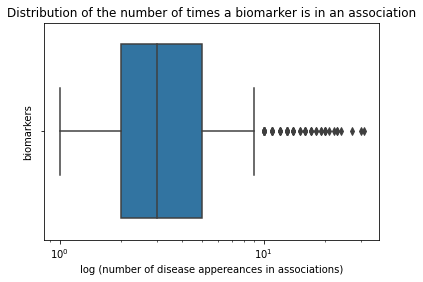

In [99]:
import matplotlib.pyplot as plot
import seaborn as sns

ax = sns.boxplot( x=biomarker_counts['biomarker appereances'] )
ax.set_xscale("log")
ax.set(xlabel='log (number of disease appereances in associations)', ylabel='biomarkers')
ax.set(title='Distribution of the number of times a biomarker is in an association')

**Obtaining the number of times a disease appears in a biomarker-disease-biomarker concentration-sample association**

In [100]:
disease_counts = df_disease_marker['disease_id'].value_counts().to_frame()
disease_counts = disease_counts.rename(columns={'disease_id': 'disease appereances'})
print(disease_counts.describe())
disease_counts

       disease appereances
count           341.000000
mean              8.102639
std              24.981959
min               1.000000
25%               1.000000
50%               2.000000
75%               7.000000
max             252.000000


,disease appereances
C0039870,252
C0028754,252
C0451819,252
C0002395,82
C0154671,82
...,...
C0699791,1
C0238052,1
C1708349,1
C0014038,1


[Text(0.5, 1.0, 'Distribution of the number of times a disease is in an association')]

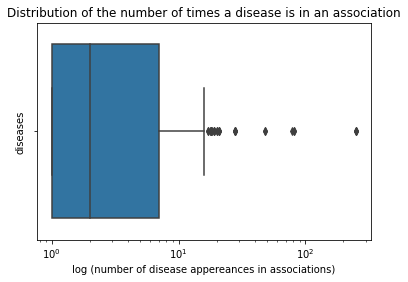

In [101]:
#associations refers to biomarker-disease-biomarker concentration-sample
ax = sns.boxplot( x=disease_counts['disease appereances'] )
ax.set_xscale("log")
ax.set(xlabel='log (number of disease appereances in associations)', ylabel='diseases')
ax.set(title='Distribution of the number of times a disease is in an association')

In [102]:
df_disease_marker

,marker,disease_id,concentration,sample,source_id
0,1-Methylhistidine,C0028754,10.9 (0.80-21.0) umol/mmol creatinine,Urine,7
2,1-Methylhistidine,C0039870,10.9 (0.80-21.0) umol/mmol creatinine,Urine,7
3,1-Methylhistidine,C0451819,10.9 (0.80-21.0) umol/mmol creatinine,Urine,7
4,(R)-3-Hydroxybutyric acid,C0028754,235.0 (218.0-252.0) uM,Blood,7
6,(R)-3-Hydroxybutyric acid,C0039870,235.0 (218.0-252.0) uM,Blood,7
...,...,...,...,...,...
3291,Trihexosylceramide (d18:1/22:0),C0020597,0.90 (1.00-0.90) uM,Blood,7
3292,Trihexosylceramide (d18:1/26:1(17Z)),C0020597,0.90 (0.90-1.00) uM,Blood,7
3293,Trihexosylceramide (d18:1/24:0),C0020597,0.90 (0.90-1.00) uM,Blood,7
3294,Tetrahexosylceramide (d18:1/12:0),C0020597,1.00 (1.00-1.1) uM,Blood,7


In [103]:
duplicateRowsDF_marker = markerdb_disnet[markerdb_disnet.duplicated(['marker', 'disease_id'])]
duplicateRowsDF_marker.mode()

,marker,name,concentration,sample,source_id,source_name,disease_id,disease_name,vocab
0,L-Valine,obesity,1.4 (0.79-2.0) uM,Blood,7,Markerdb,C0028754,Obesity,MSH


**Finding the most repeated marker-disease associations**

In [104]:
marker_disease = markerdb_disnet.groupby(['marker', 'name']).count()
marker_disease = marker_disease.reset_index()
marker_disease[['marker', 'name','disease_id']].sort_values(by=['disease_id'], ascending = False).head(20)

,marker,name,disease_id
468,L-Leucine,maple syrup urine disease,20
129,Alpha-ketoisovaleric acid,maple syrup urine disease,20
66,3-Methyl-2-oxovaleric acid,maple syrup urine disease,20
39,2-Hydroxy-3-methylbutyric acid,maple syrup urine disease,20
508,L-Valine,maple syrup urine disease,20
368,Hydroxyisocaproic acid,maple syrup urine disease,20
558,Mevalonic acid,mevalonic aciduria,18
528,Lipoxin A4,coronary artery disease,12
454,L-Homocystine,homocystinuria,10
135,Androstenedione,congenital adrenal hyperplasia,10


In [105]:
#duplicateRowsDF_marker_1.query('name == "obesity" & marker == "1-Methylhistidine"')

In [106]:
##########################################################################################

# Study of the relationships between the Biomarkers and DISNET features

In [107]:
import mysql.connector
import json
conn_param_file = 'C:/Users/end user/OneDrive/Desktop/UPM Master/CTB TFM/Datasets/DISNET_CONNECTION_correct.json'
# Setting the connection to the database

# The connection configuration is stored in a JSON file
with open(conn_param_file, 'r') as f:
    config = json.load(f) # The JSON file is translated to a pyhton dictionary

# Stablishing the connection with the parameters in the dictionary
cnx = mysql.connector.connect(**config)

**Querying DISNET to obtain the ICD-10 classification names and class range that correspond to each CUI code (disease_id) stored in DISNET**

In [108]:
query_icd = """
             SELECT DISTINCT
                d.disease_id, i.class_name, i.class_range
             FROM
                disnet_biolayer.disease d
                    INNER JOIN
                disnet_biolayer.has_code hc ON d.disease_id = hc.disease_id
                    LEFT JOIN
                disnet_biolayer.tmp_icd i ON 1 = 1
             WHERE
                hc.vocabulary = 'ICD10CM'
                    AND SUBSTR(i.class_range, 1, 3) <= SUBSTR(hc.code_id, 1, 3)
                    AND SUBSTR(i.class_range, 5, 3) >= SUBSTR(hc.code_id, 1, 3)

            """

query_icd = pd.read_sql_query(query_icd, con = cnx)
query_icd 

,disease_id,class_name,class_range
0,C0008354,Certain infectious and parasitic diseases,A00-B99
1,C0178238,Certain infectious and parasitic diseases,A00-B99
2,C0041466,Certain infectious and parasitic diseases,A00-B99
3,C0030528,Certain infectious and parasitic diseases,A00-B99
4,C0152491,Certain infectious and parasitic diseases,A00-B99
...,...,...,...
3613,C0013182,"Injury, poisoning and certain other consequenc...",S00-T98
3614,C0041755,"Injury, poisoning and certain other consequenc...",S00-T98
3615,C0085639,External causes of morbidity and mortality,V01-Y98
3616,C0019699,Factors influencing health status and contact ...,Z00-Z99


**Comparison between the distribution of DISNET genes, variants and pathways by ICD-10 diseases and the distribution of biomarkers by ICD-10 diseases.**

**We first generate a dataframe in which we group the disease_id and class_name columns of each DISNET disease to find out how many genes each grouping has associated with it.**

In [109]:
query_disease_gene = """
                         SELECT*
                         FROM
                             disnet_biolayer.disease_gene
                        """

query_disease_gene = pd.read_sql_query(query_disease_gene, con = cnx)
query_disease_gene 

,disease_id,gene_id,source_id,score,sio_id
0,C0000731,72,1,0.10,SIO_001121
1,C0000731,672,1,0.10,SIO_001121
2,C0000731,1280,1,0.10,SIO_001121
3,C0000731,1482,1,0.10,SIO_001121
4,C0000731,1811,1,0.10,SIO_001121
...,...,...,...,...,...
358204,C4540535,2778,1,0.30,SIO_001122
358205,C4540536,2778,1,0.30,SIO_001122
358206,C4540602,2778,1,0.30,SIO_001122
358207,C4543926,3060,1,0.03,SIO_001121


**Merging query_disease_gene and query_icd dataframes. Then, the resulting merged dataframe will be merged again with a df containing the icd10 short version names**

In [110]:
disease_gene_icd= pd.merge(query_disease_gene, query_icd.drop(['class_name'], axis=1), on='disease_id')
disease_gene_icd = disease_gene_icd.drop(['source_id', 'sio_id','score'], axis=1)
icd_10_short = pd.read_csv('icd10_links.csv')
disease_gene_icd= pd.merge(disease_gene_icd, icd_10_short, on='class_range')
disease_gene_icd

,disease_id,gene_id,class_range,icd_class_name,class_name
0,C0000744,25,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
1,C0000744,27,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
2,C0000744,238,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
3,C0000744,338,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
4,C0000744,348,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
...,...,...,...,...,...
118041,C1691779,2707,H60-H95,Diseases of the ear and mastoid process,Ear
118042,C1691779,4036,H60-H95,Diseases of the ear and mastoid process,Ear
118043,C1691779,5172,H60-H95,Diseases of the ear and mastoid process,Ear
118044,C1691779,8772,H60-H95,Diseases of the ear and mastoid process,Ear


In [111]:
disease_gene_icd_test = disease_gene_icd[['disease_id', 'class_name', 'gene_id']]
#disease_gene_icd_test['gene_id'] = disease_gene_icd_test['gene_id'].apply(str)
disease_gene_icd_test = disease_gene_icd_test.groupby(['class_name', 'disease_id']).count()#.agg(num_feature_disease=('gene_id', sum))
#disease_gene_icd_test
disease_gene_icd_test = disease_gene_icd_test.reset_index()
disease_gene_icd_test = disease_gene_icd_test.rename(columns={'gene_id': 'num_feature_disease'})
disease_gene_icd_test['feature'] = 'genes'
disease_gene_icd_test


,class_name,disease_id,num_feature_disease,feature
0,Circulatory,C0002940,56,genes
1,Circulatory,C0002962,54,genes
2,Circulatory,C0002963,1,genes
3,Circulatory,C0002965,19,genes
4,Circulatory,C0003486,95,genes
...,...,...,...,...
2796,Skin,C0702166,44,genes
2797,Skin,C1112570,4,genes
2798,Skin,C1260874,1,genes
2799,Skin,C2936846,1,genes


**Now that we have a dataframe with the number of genes that each class_name and disease_id pair has, we will repeat the same process for variants and pathways.**

**Variants**

In [112]:
query_variants = """
                     SELECT*
                     FROM
                         disnet_biolayer.disease_variant
                    """

query_variants = pd.read_sql_query(query_variants, con = cnx)
query_variants 

,disease_id,variant_id,source_id,score
0,C0000737,rs1057518806,1,0.70
1,C0000737,rs1057518886,1,0.70
2,C0000744,rs146064714,1,0.70
3,C0000744,rs199422219,1,0.70
4,C0000744,rs199422220,1,0.80
...,...,...,...,...
210493,C4540536,rs148033592,1,0.70
210494,C4540536,rs61749698,1,0.70
210495,C4540602,rs148033592,1,0.70
210496,C4540602,rs61749698,1,0.70


In [113]:
disease_variant_icd= pd.merge(query_variants, query_icd.drop(['class_name'], axis=1), on='disease_id')# query_disease_variant es un df de la tabla #disease_variant y query_icd un df de la consulta icd
disease_variant_icd = disease_variant_icd.drop(['source_id','score'], axis=1)
icd_10_short = pd.read_csv('icd10_links.csv')
disease_variant_icd= pd.merge(disease_variant_icd, icd_10_short, on='class_range')
disease_variant_icd

disease_variant_icd_test = disease_variant_icd[['disease_id', 'class_name', 'variant_id']]
disease_variant_icd_test = disease_variant_icd_test.groupby(['class_name', 'disease_id']).count()
disease_variant_icd_test = disease_variant_icd_test.reset_index()
disease_variant_icd_test = disease_variant_icd_test.rename(columns={'variant_id': 'num_feature_disease'})
disease_variant_icd_test['feature'] = 'variants'
disease_variant_icd_test

,class_name,disease_id,num_feature_disease,feature
0,Circulatory,C0002940,7,variants
1,Circulatory,C0002962,64,variants
2,Circulatory,C0002963,2,variants
3,Circulatory,C0002965,4,variants
4,Circulatory,C0003486,9,variants
...,...,...,...,...
1623,Skin,C0406317,1,variants
1624,Skin,C0409974,17,variants
1625,Skin,C0477474,1,variants
1626,Skin,C0702166,8,variants


**Pathways**

In [114]:
query_pathways = """
                 SELECT DISTINCT
                 dg.disease_id,
                 gp.pathway_id
                 FROM
                     disnet_biolayer.disease_gene dg
                         INNER JOIN
                     disnet_biolayer.gene g ON dg.gene_id = g.gene_id
                         INNER JOIN
                     disnet_biolayer.gene_pathway gp ON g.gene_id = gp.gene_id
                """

query_pathways = pd.read_sql_query(query_pathways, con = cnx)
query_pathways

,disease_id,pathway_id
0,C0000731,WP117
1,C0000731,WP138
2,C0000731,WP15
3,C0000731,WP1533
4,C0000731,WP1544
...,...,...
400696,C4540602,WP734
400697,C4545381,WP306
400698,C4545381,WP322
400699,C4545381,WP3611


In [115]:
disease_pathways_icd= pd.merge(query_pathways, query_icd.drop(['class_name'], axis=1), on='disease_id')# query_disease_pathways es un df de la tabla #disease_pathways y query_icd un df de la consulta icd
#disease_pathways_icd #= disease_pathways_icd.drop(['source_id','score'], axis=1)
icd_10_short = pd.read_csv('icd10_links.csv')
disease_pathways_icd= pd.merge(disease_pathways_icd, icd_10_short, on='class_range')
disease_pathways_icd

disease_pathways_icd_test = disease_pathways_icd[['disease_id', 'class_name', 'pathway_id']]
disease_pathways_icd_test = disease_pathways_icd_test.groupby(['class_name', 'disease_id']).count()
disease_pathways_icd_test = disease_pathways_icd_test.reset_index()
disease_pathways_icd_test = disease_pathways_icd_test.rename(columns={'pathway_id': 'num_feature_disease'})
disease_pathways_icd_test['feature'] = 'pathway'
disease_pathways_icd_test

,class_name,disease_id,num_feature_disease,feature
0,Circulatory,C0002940,120,pathway
1,Circulatory,C0002962,96,pathway
2,Circulatory,C0002963,8,pathway
3,Circulatory,C0002965,79,pathway
4,Circulatory,C0003486,139,pathway
...,...,...,...,...
2423,Skin,C0549567,9,pathway
2424,Skin,C0600336,1,pathway
2425,Skin,C0702166,81,pathway
2426,Skin,C1112570,4,pathway


**Now we process df_disease_marker dataframe where the biomarkers and the diseases associated to each of them is stored. We will add the ICD class_name to each disease_id**

In [116]:
df_disease_marker_1 = df_disease_marker[['marker', 'disease_id']]
icd_marker= pd.merge(df_disease_marker_1, query_icd.drop(['class_name'], axis=1), on='disease_id')
icd_marker
# disease_gene_icd = disease_gene_icd.drop(['source_id', 'sio_id','score'], axis=1)
icd_10_short = pd.read_csv('icd10_links.csv')
icd_marker= pd.merge(icd_marker, icd_10_short, on='class_range')
icd_marker

,marker,disease_id,class_range,icd_class_name,class_name
0,1-Methylhistidine,C0028754,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
1,(R)-3-Hydroxybutyric acid,C0028754,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
2,L-Carnitine,C0028754,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
3,L-Threonine,C0028754,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
4,Ornithine,C0028754,E00-E90,"Endocrine, nutritional and metabolic diseases",Metabolic
...,...,...,...,...,...
1712,Theophylline,C1319018,J00-J99,Diseases of the respiratory system,Respiratory
1713,Theobromine,C1319018,J00-J99,Diseases of the respiratory system,Respiratory
1714,11b-PGF2a,C1319018,J00-J99,Diseases of the respiratory system,Respiratory
1715,"1,7-Dimethyluric acid",C1319018,J00-J99,Diseases of the respiratory system,Respiratory


In [117]:
icd_marker_1 = icd_marker[['disease_id', 'class_name', 'marker']]

icd_marker_2 = icd_marker.groupby(['class_name', 'disease_id']).count()#agg(num_feature_disease=('marker_id', sum))
icd_marker_2 = icd_marker_2.reset_index()
# icd_marker_1 = icd_marker.reset_index()
icd_marker_2 = icd_marker_2.rename(columns={'marker': 'num_feature_disease'})
icd_marker_2['feature'] = 'biomarker'
icd_marker_2

,class_name,disease_id,num_feature_disease,class_range,icd_class_name,feature
0,Circulatory,C0004153,1,1,1,biomarker
1,Circulatory,C0010054,1,1,1,biomarker
2,Circulatory,C0010068,1,1,1,biomarker
3,Circulatory,C0010072,3,3,3,biomarker
4,Circulatory,C0020538,9,9,9,biomarker
...,...,...,...,...,...,...
175,Respiratory,C0264413,8,8,8,biomarker
176,Respiratory,C1260881,8,8,8,biomarker
177,Respiratory,C1319018,8,8,8,biomarker
178,Skin,C0013595,2,2,2,biomarker


**Plotting the biomarker and feature distribution per ICD-10 disease group**

[Text(0.5, 1.0, 'Biomarker and gene distribution per ICD10 disease group')]

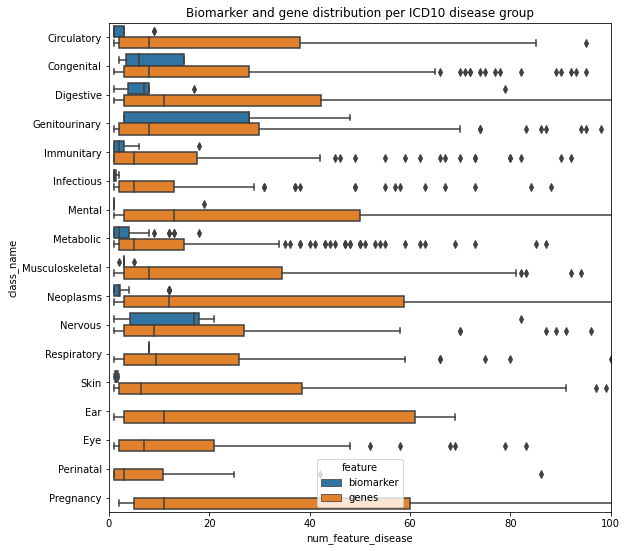

In [118]:
df_to_plot = pd.concat([icd_marker_2, disease_gene_icd_test])
fig, ax = plot.subplots(figsize = (9, 9)) 
plot.xlim(0, 100)
ax = sns.boxplot(data=df_to_plot, x='num_feature_disease', y='class_name', hue='feature')
ax.set(xlabel='num_feature_disease', ylabel='class_name')
ax.set(title='Biomarker and gene distribution per ICD10 disease group')

[Text(0.5, 1.0, 'Variant and gene distribution per ICD10 disease group')]

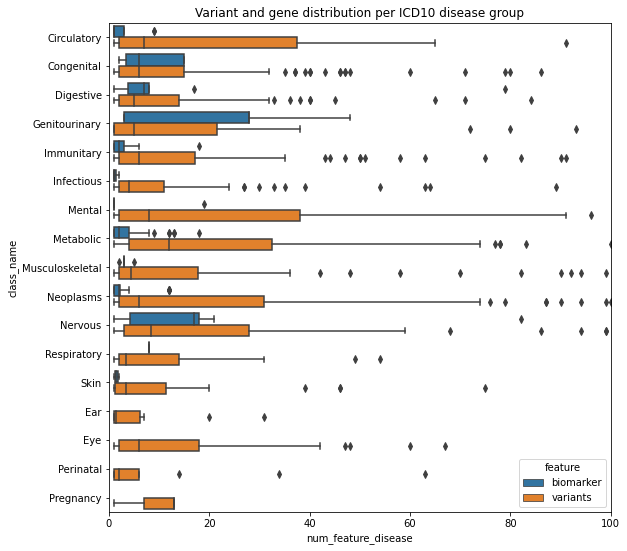

In [119]:
df_to_plot = pd.concat([icd_marker_2, disease_variant_icd_test])
fig, ax = plot.subplots(figsize = (9, 9)) 
#ax.set_xscale("log")
plot.xlim(0, 100)
ax = sns.boxplot(data=df_to_plot, x='num_feature_disease', y='class_name', hue='feature')
ax.set(xlabel='num_feature_disease', ylabel='class_name')
ax.set(title='Variant and gene distribution per ICD10 disease group')

[Text(0.5, 1.0, 'Pathway and gene distribution per ICD10 disease group')]

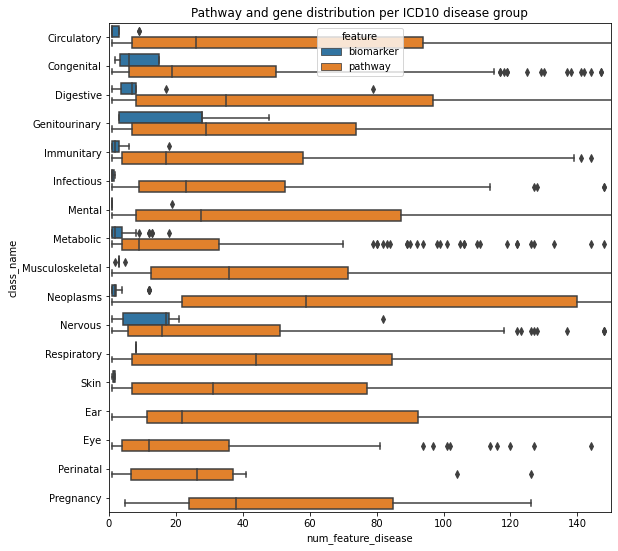

In [121]:
df_to_plot = pd.concat([icd_marker_2, disease_pathways_icd_test])
fig, ax = plot.subplots(figsize = (9, 9)) 
plot.xlim(0, 150)
ax = sns.boxplot(data=df_to_plot, x='num_feature_disease', y='class_name', hue='feature')
ax.set(xlabel='num_feature_disease', ylabel='class_name')
ax.set(title='Pathway and gene distribution per ICD10 disease group')

In [58]:
#################################################

<ipython-input-122-b00c48883f2e>:5: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plot.xlim(0, 200)


[Text(0.5, 0, 'log_num_feature_disease'), Text(0, 0.5, 'class_name')]

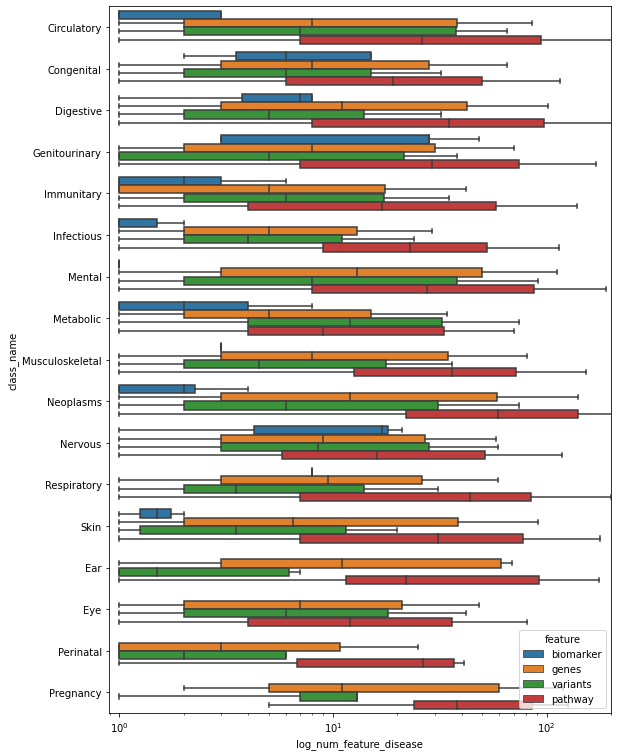

In [122]:
df_to_plot = pd.concat([icd_marker_2, disease_gene_icd_test, disease_variant_icd_test, disease_pathways_icd_test])
fig, ax = plot.subplots(figsize = (9, 13)) 
#plot.xlim(0, 150)
ax.set_xscale("log")
plot.xlim(0, 200)
ax = sns.boxplot(data=df_to_plot, x='num_feature_disease', y='class_name', hue='feature', showfliers = False)
ax.set(xlabel='log_num_feature_disease', ylabel='class_name')
#ax.set(title='Biomarkers, genes, variants and pathways distribution per ICD10 disease group')